# A comparison of the static displacement of Mindlin-Reissner and Kirchhoff-Love plates using a semi-analytic Navier solution under the effect of a uniformly distributed constant load

# Navier's semi-analytic solution

In [67]:
import numpy as np

from sigmaepsilon.solid.fourier import (
    RectangularPlate,
    LoadGroup,
    RectangleLoad,
)


def solve(size: tuple, shape: tuple, model: str) -> float:
    # geometry
    Lx, Ly, t = size

    # material
    E = 2890.0
    nu = 0.2

    # material stiffness matrix
    G = E / 2 / (1 + nu)
    D = (
        np.array([[1, nu, 0], [nu, 1, 0], [0.0, 0, (1 - nu) / 2]])
        * t**3
        * (E / (1 - nu**2))
        / 12
    )
    if model == "MR":
        S = np.array([[G, 0], [0, G]]) * t * 5 / 6
    else:
        S = None

    # uniform distributed load
    loads = LoadGroup(
        LC1=RectangleLoad(x=[[0, 0], [Lx, Ly]], v=[-0.1, 0, 0]),
    )
    loads.lock()

    coords = np.array([[Lx, Ly, 0]], dtype=float)
    plate = RectangularPlate((Lx, Ly), shape, D=D, S=S)
    results = plate.solve(loads, coords)

    return results["LC1"][0, 0]

## Ploting

In [68]:
def generate_plot_data(size, thicknesses):
    Lx, Ly = size
    nx, ny = 20, 20
    absdiff = []
    for t in thicknesses:
        UZ_MR = solve((Lx, Ly, t), (nx, ny), "MR")
        UZ_KL = solve((Lx, Ly, t), (nx, ny), "KL")
        absdiff.append(UZ_MR / UZ_KL - 1)
    return absdiff

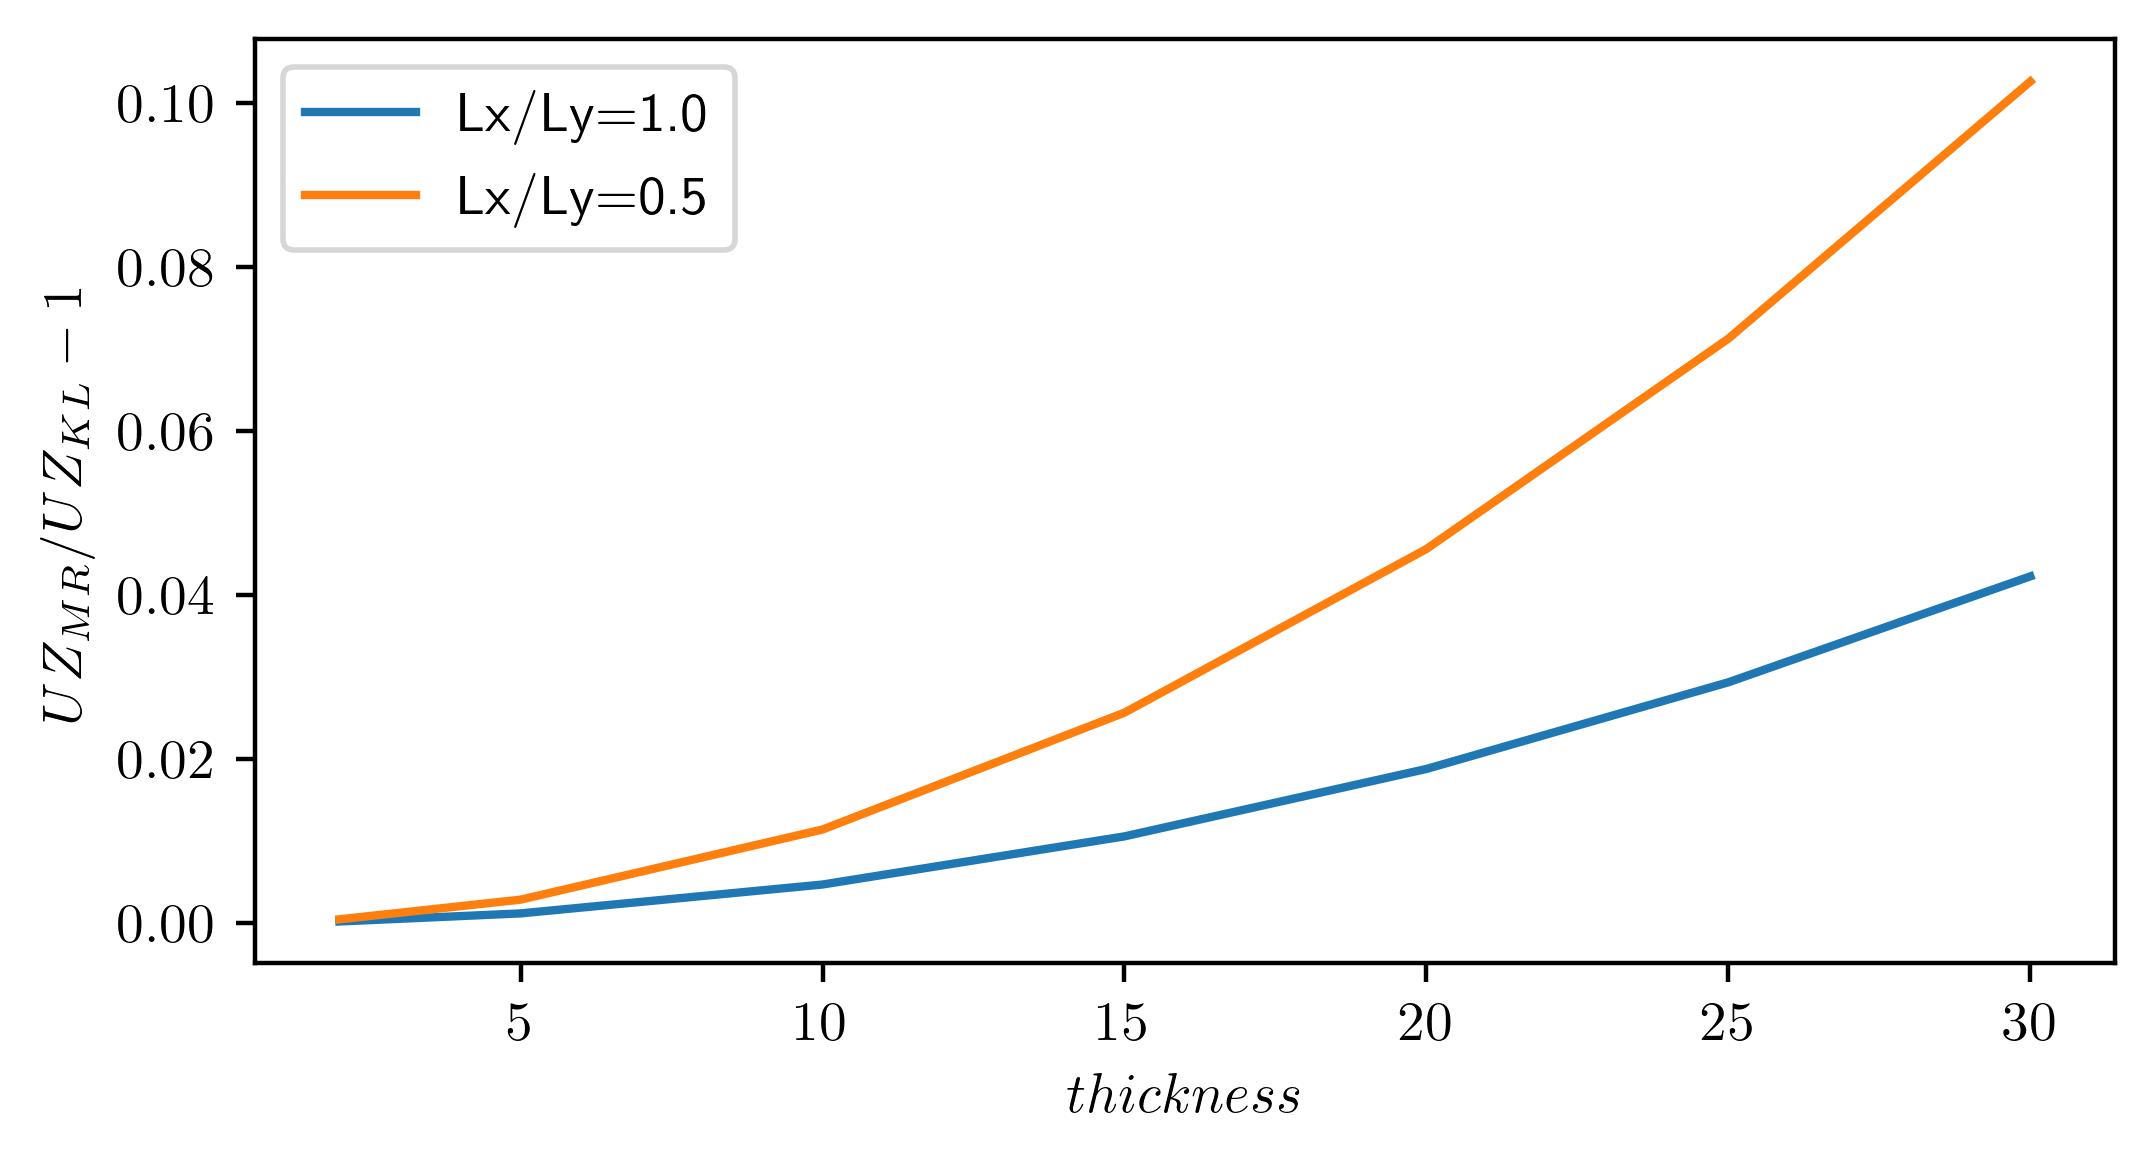

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(6, 3), dpi=400, sharex=True)

thicknesses = [2, 5, 10, 15, 20, 25, 30]

size = (800, 800)
width_ratio = size[0] / size[1]
absdiff = generate_plot_data(size, thicknesses)
axs.plot(thicknesses, absdiff, label="Lx/Ly={}".format(width_ratio))

size = (400, 800)
width_ratio = size[0] / size[1]
absdiff = generate_plot_data(size, thicknesses)
axs.plot(thicknesses, absdiff, label="Lx/Ly={}".format(width_ratio))

axs.set_xlabel("$thickness$")
axs.set_ylabel("$UZ_{MR}/UZ_{KL} - 1 $")
axs.legend()

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)